## Problem 1 (code): Optimization

We are going to implement functions to compute the gradient and Jacobian symbolically using sympy. Let us first recall the syntax.


In [264]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [265]:
# we can define coordinates in sympy by
xi = sy.symbols('x1, x2')

f = sy.Function('f')
# example for syntax
sy.diff(xi[0] * f(xi[0],xi[1]), xi[0])

x1*Derivative(f(x1, x2), x1) + f(x1, x2)

Write a function to compute the gradient of $f$ with respect to all coordinates in xi (as in the above list); allow the number of coordinates to vary. The output should be a list.

In [267]:
def gradient(f, xi):
    # complete this function
    pass

Write a function to compute the Jacobian of a vector valued function
$$
F: \mathbb{R}^m \to \mathbb{R}^n
$$
The input should be F, a list of functions from $\mathbb{R}^m\to \mathbb{R}$, and a list of coordinates xi, just like above. The output should be a list of lists.

In [268]:

lst = list(map(sy.Function, ['f1', 'f2']))
F = []
for f in lst:
    F.append(f(xi[0], xi[1]))


In [269]:
def jacobian(F, xi):
    #complete this.
    pass


In [103]:
# Here you can test your code.
gradient(sy.sin(xi[0]*xi[1]), xi)

[x2*cos(x1*x2), x1*cos(x1*x2)]

In [104]:
# Here you can test your code.
F = [sy.sin(xi[0] * xi[1]), xi[0]**2]
jacobian(F,xi)

[[x2*cos(x1*x2), x1*cos(x1*x2)], [2*x1, 0]]

We now consider the function 
$$
f(x_0,x_1)=
(x_0^2 + x_1^2) + \cos(5 x_0+6x_1) + \sin(x_1).
$$
We want to find the minimum by numerical means. First we compute the gradient.

In [ ]:
## Find the gradient using sympy and the gradient function you made.


Put the result of $f$ in an numpy array of shape (2,)

In [270]:
def f(x):
    return (x[0]**2 + x[1]**2) + np.cos(5*x[0]+6*x[1])+np.sin(x[1])

# add a function computing the gradient of f
def df(x):
    # complete this
    pass

Execute the following piece of code for a visualization of the values of the function.

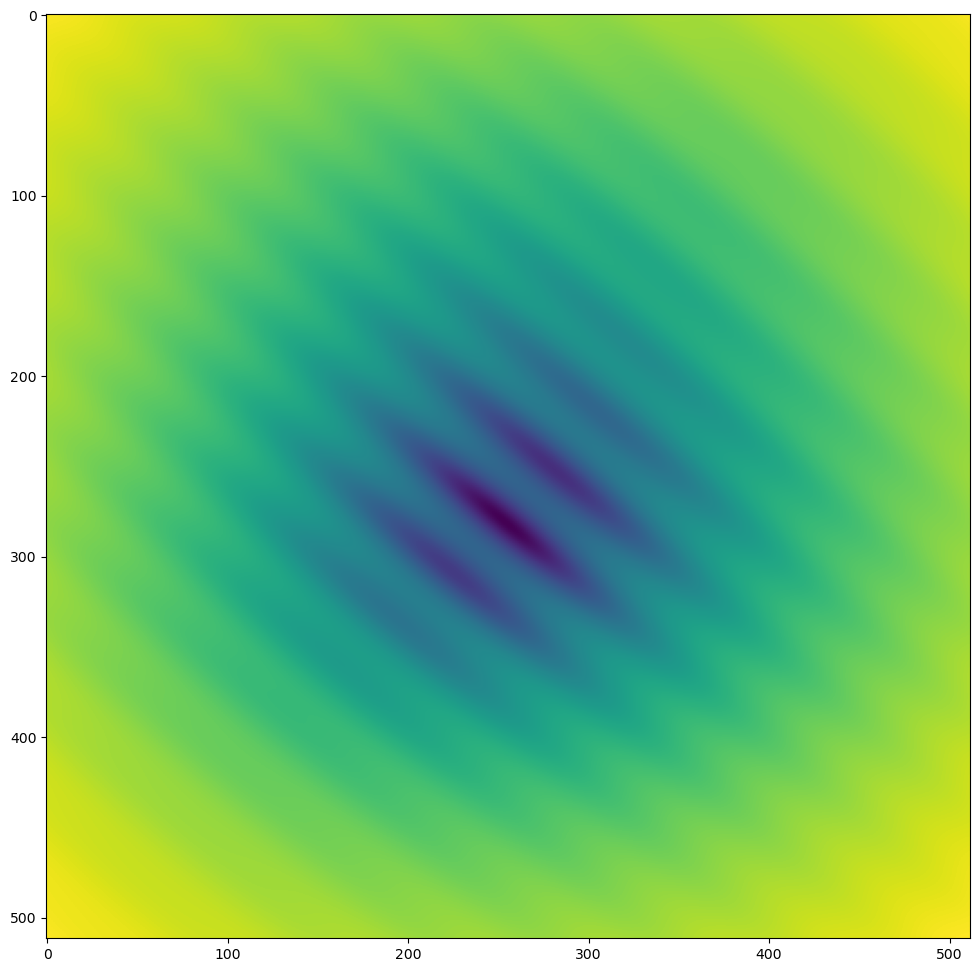

In [112]:

N = 512
A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        x = np.array([ 10*(j/N - 0.5), -10*(i/N - 0.5)] )
        A[i,j] = np.log(f(x)+2)
plt.figure(figsize=(12,12))
plt.imshow(A)

### Gradient flow:
Write a function computing a step of the gradient descent with learning rate $\eta$.
Use the above function for df to obtain the gradient, and follow this gradient for an amount eta.

In [113]:
def grad_flow(x, eta):
    # complete this
    pass

Take 1000 random point samples $(x,y)$ on the square $[-3/2,3/2] \times [-3/2,3/2]$.
For each of these point samples:
* apply the gradient flow for 1000 steps
* store the end point and the function values in an array runs

Afterwards give the smallest value of $f$ you can find with this method.
As a reminder np.random.rand(n) returns an array of size n with random values in $[0,1]$.

In [ ]:
# code this up
runs = []
for run in range(0, 1000):
    # Fill in these steps: generate a random point in the square
    # Execute 1000 gradient descent steps.
    pass
    # we store the point and the value at that point
    runs.append(np.asarray([x, f(x)]) )
runs = np.asarray(runs)
idx = np.argmin(runs[:,1])
print("Smallest value = ", runs[idx][1], " at ", runs[idx][0])

After finding the minimal value, write the code to plot the location of the minimum. The output should be similar to the picture below.

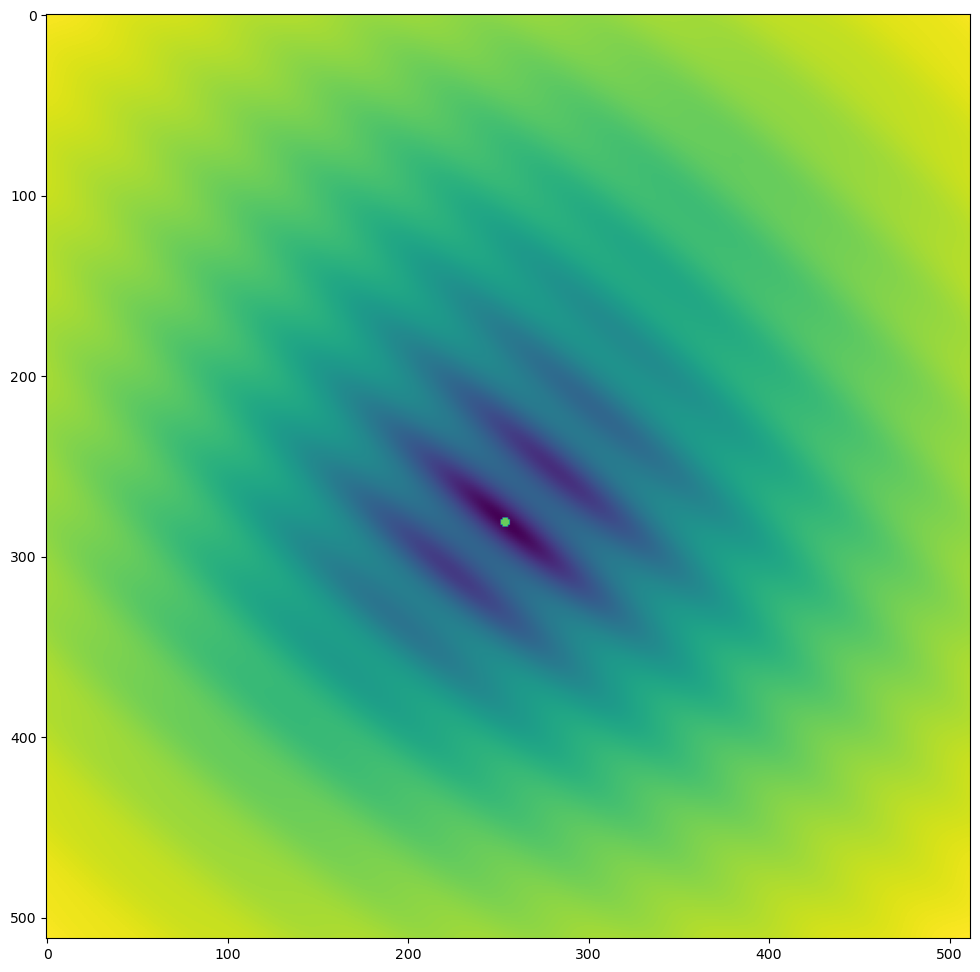

In [116]:
#code this up.

### Levenberg-Marquardt
Here is a reminder of the Levenberg-Marquardt algorithm

* Compute the linear approximation 
$$
L_k(x) =f(x_k) +J_{x_k}f (x-x_k)
$$
* With the above formula find the (tentative) minimizer $x_{k+1}$ of
$$
\Vert L_k(x) \Vert^2 +\lambda_k \Vert x - x_k \Vert^2
$$
* Check the candidate: if $\Vert f(x_{k+1})\Vert^2 < \Vert f(x_{k})\Vert^2$, then accept the candidate, and reduce $\lambda$ by setting $\lambda_{k+1}\gets 0.8 \lambda_k$.

If $\Vert f(x_{k+1})\Vert^2 \geq \Vert f(x_{k})\Vert^2$, then $x_{k+1}\gets x_k$ and $\lambda_{k+1} =2 \lambda_k$
* Set $k\gets k+1$: stop if $k_{max}$ is reached. Otherwise, go back to step 1.



As a reminder, linear systems of the form $Ax=b$, where $A$ is invertible, can be solved by
x = np.linalg.solve(A, b)

Check the shapes of the numpy arrays to make sure that you have the right form.

In [117]:
def levenberg_marquardt_candidate(x, lambda_n):
    # code this up
    pass

def levenberg_marquardt(x, lambda_n):
    # code this up
    pass
    

Test the Levenberg-Marquardt algorithm for 1000 point samples on the square.
You will find that there are numerical problems. What happens? To fix this, you find out what happens to the penalty term, and write correction to prevent it from blowing up.

In [ ]:
runs = []
for run in range(0, 1000):
    #complete this (just like for the gradient flow)
    pass
    # we store the end point and the value at the end point in runs
    runs.append(np.asarray([x, f(x)]) )
runs = np.asarray(runs)

idx = np.argmin(runs[:,1])
print("Smallest value = ", runs[idx][1], " at ", runs[idx][0])

Explain what you did.

## Problem 2 (code): Interpolation and extrapolation
Suppose you are given points $x_0,\ldots, x_n\in \mathbb{R}$ and a function $f:\mathbb{R} \to \mathbb{R}$. The goal is to find a polynomial 
$$
p(x)=c_0 + c_1x + \ldots +c_n x^n
$$ 
of degree at most $n$ such that 
* $p(x_i)=f(x_i)$ for $i=0,\ldots,n$

We need a function that evaluates a polynomial with coefficients $c_i$.

In [227]:
# assume c is a list with the coefficients of the polynomial
# code this up
def polynomial(x, c):
    # complete this
    sm = 0 
    for i in range(len(c)):
        sm += c[i] * x ** i
    return sm 

Now given a function $f$, we need to find the coefficients. Use the above equation to get a linear system for the coefficients $c_i$. Solve it using
np.linalg.solve(A,b), which gives a solution to $Ax=b$.

In [245]:
# a test function
def f(x):
    return np.exp(-1/(x+0.00001)**4) / (1 + x**2)

# code this up
def find_coeff(xn, f): 
    # complete the code
    n = len(xn)
    A = np.zeros((n,n))
    b = np.zeros((n,1))
    for i in range(n):
        for j in range(n):
            A[i,j] = xn[i]**j
        b[i] = f(xn[1])
    c = np.linalg.solve(A,b)
    return c 


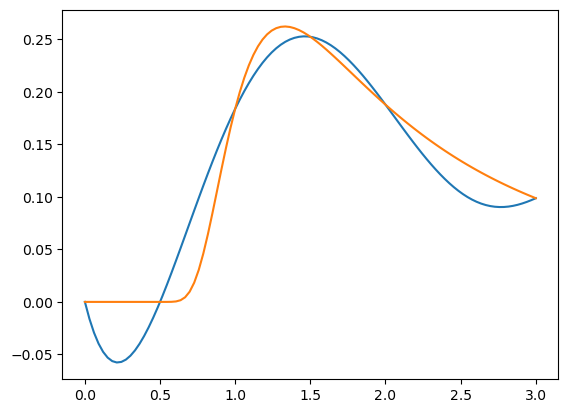

In [246]:
# Your code should be such that the following works.
coef = find_coeff([0.0, 0.5, 1, 1.5,  2, 3], f)
xs = np.linspace(0.0,3, 100)
plt.plot(xs, polynomial(xs, coef))
plt.plot(xs, f(xs))
plt.show()
plt.close()

The following piece of code approximates the given function by interpolating on evenly spaced points on the interval $[0,10]$. 

a) Explain using some code that higher degree polynomials (try degrees 1-40) provide better approximations (assuming the degrees are not so high as to cause serious rounding errors).

b) Explain the wavy pattern behavior. As a hint, think of a function that vanishes on the interval [0,9], but is non-zero in 10: what can you say about the zeros of an interpolating polynomial.

In [ ]:
degree = 2
coef = find_coeff(np.linspace(0.0, 10, degree+1), f)
xs = np.linspace(0.0, 10, 2000) ## many points for drawing a clear figure
plt.plot(xs, polynomial(xs, coef))
plt.plot(xs, f(xs))
plt.ylim(-0.5,0.5)
plt.show()
plt.close()

Explain your answer and support it with the code block below by plotting what happens for lower and higher degree polynomials.

## Problem 3: Least squares and polynomials
Interstead of interpolating we can apply the least squares method.
We consider the function $sin(x)$ on the interval $[-\pi, \pi]$ with points xm.

Implement a function computing the coefficients of a polynomial of degree at most $n$ that approximates the points $xm,ym$ well in least squares' sense.
* input should be xm, ym and the maximal degree n
* output should be the coefficients of the polynomial and the error

In [256]:
xm = np.linspace(-np.pi, np.pi, 120)
ym = np.cos(xm)

def approx_poly(xm, ym, n):
    # complete this function
    m = len(xm)
    A = np.zeros( (m,n) )
    for i in range(m):
        for j in range(n):
            A[i,j] = xm[i]**j
    coeff = np.linalg.pinv(A)@ ym 
    error = np.linalg.norm(A@coeff - ym)
    return coeff, error 

In [271]:
degree = 4
coef = find_coeff(np.linspace(0.0, 10, degree+1), f)
xs = np.linspace(0.0, 10, 2000) ## many points for drawing a clear figure
plt.plot(xs, polynomial(xs, coef))
plt.plot(xs, f(xs))
plt.ylim(-0.5,0.5)
plt.show()
plt.close()

We are now going to evaluate the errors for degree ranging from 0 to 80.

In [272]:
#code this
results = []
for i in range(80):
    coef, error = approx_poly(xm, ym, i)
    results.append(error)
plt.plot(results)

#when degree becomes very large the errors become large too 
#we have a bunch of data points, if we increase the coefficients, in theory it should improve approximation because we have more equations than unknows 
#but in reality it does not happen because 

We need to explain this result. 
* First explain what should be happening theoretically. 
* Then explain why practice is different

Give your answer

To deal with this, we will use so-called Chebyshev polynomials. The $n$-th Chebyshev polynomial on $[-1,1]$ can be defined by the formula
$$
T_n(x)=\cos(n\arccos(x))
$$
While $T_n$ may appear not to be a polynomial in $x$, it actually is.

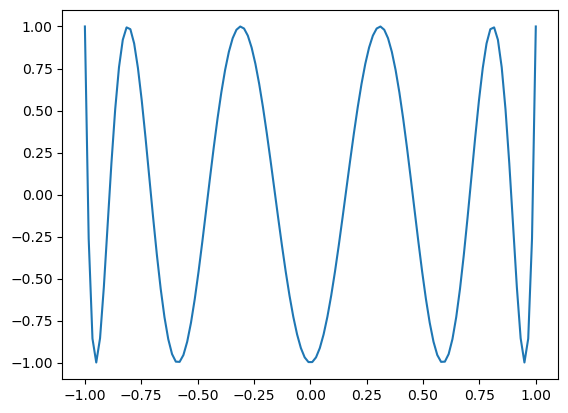

In [260]:
def chebyshev_n(x, n):
    return np.cos(n*np.arccos(x))

xs = np.linspace(-1, 1, 120)
plt.plot(xs, chebyshev_n(xs, 10))

Write a function that approximates a given point cloud xm, ym by a Chebyshev polynomial of degree at most $n$. The same method as before can be used, but now use $T_n(x)$ instead of $x^n$.

In [261]:
def approx_cheb_poly(xm, ym, n):
    # complete this
    pass

Implement a function that evaluates a sum of the form
$$
\sum_{i=0}^n c_i T_i(x).
$$

In [262]:
def eval_cheb_poly(x, c):
    # complete
    pass

The following code should evaluate without problems. Note that we are using xs instead on xm since our way of computing Chebyshev polynomials needs the input to lie in $[-1,1]$.

In [ ]:
coeff, error = approx_cheb_poly(xs, ym, 7)

plt.plot(xm, eval_cheb_poly(xs, coeff))
plt.plot(xm, ym)
plt.show()
plt.close()


Again evaluate the error. Explain the results as before. Why do you think this is better?

In [ ]:
# Code this

Give your answer.

## Problem 4: PCA and classifiers

We load a standard dataset, the iris data. The data can be accessed via iris.data. The labels are contained in iris.target.


Using a library call, we obtain the first two prinicipal components of the unnormalized data in X_reduced.

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X_reduced = PCA(n_components=2).fit_transform(iris.data)

Make a scatter plot of the the first two principal components of the iris data: color the data by their label (use c=).

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=iris.target)

To train a linear classifier, we can use one-hot encoding: this means that we make the following assigments:
$$
0 \mapsto \left(
\begin{array}{c}
1\\
0\\
0
\end{array}    
\right)
,\quad
1 \mapsto \left(
\begin{array}{c}
0\\
1\\
0
\end{array}    
\right)
,\quad
2 \mapsto \left(
\begin{array}{c}
0\\
0\\
1
\end{array}    
\right)
$$
Write a function that converts each label into one-hot-encoding $y$

In [ ]:
# code this up
def retarget(A):
    pass
y = retarget(iris.target)

Now perform linear regression on independent variables X and dependent variables $y$ (obtained by one-hot-encoding).

The syntax is as follows:
model = LinearRegression()
model.fit(X, y)
model.predict(X) returns the predicts (not in one-hot form)

We perform linear regression on the first two principal components,

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model: use X_reduced as independent variable

This is a linear classifier, so the output values are just 3-vectors with various entries. The largest entry indicate the most likely class. Write a function returning the predict class labels 0,1,2. We won't split into training and test set.

In [274]:
# code this: put the result in y_pred. Make sure the type is correct.

We check the results with a confusion matrix.

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(iris.target, y_pred)

Now repeat this process for 
* X = full data: iris.data
* X = first principal component
* X = first three principal components
* X = all four principal components

In [ ]:
# X = full data: iris.data
model = LinearRegression()
# fit a model with the full data and make a classifier
metrics.confusion_matrix(iris.target, y_pred)

In [ ]:
# X = first principal component


In [ ]:
# X = first three principal components


In [ ]:
# X = all four principal components

Is there a difference between the first case, X = full data, and the last case,X = all four principal components? Explain your answer.

# Problem 5 (code): Disease models
In this problem we look at a simple agent-based model for the spread of diseases. We do this with a class.
We model the following:
* each agent moves around at random
* each agent carries an infection value: a value 0.0 means susceptible, a value between 0.5 and 1.0 means contagious. A value lower than 0.5 means immune
* an infected agent can infect others with a given probability, provided they are contagious and sufficiently close.

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def clamp(val, lower, upper):
    if val < lower:
        return lower
    if val >= upper:
        return upper - 1
    return val

Here is the definition of the class. Just execute the cell.

In [140]:
class AgentModel():
    def clearAgents(self):
        self.agents = np.random.randint(0, self.width, self.N * self.nrStates)
        self.agents = self.agents.reshape((self.N, self.nrStates))
        self.agents = np.asarray(self.agents, dtype=float)
        self.agents[:,2] = 0.0
        for i in range(self.initial_size):
            self.agents[i,2] = 1.0

    def __init__(self, _N, _width, prob=0.0095350, decay=0.90, lowest=0.00061251, initial_size=10, seed=0) -> None:
        np.random.seed(seed)
        self.nrStates = 4
        self.N = _N
        self.width = _width
        self.prob = prob
        self.decay = decay
        self.lowest = lowest
        self.initial_size=initial_size
        self.InfectedMap = np.zeros((self.width, self.width))
        self.clearAgents()
        

    def getStatus(self, a):
        return (int(self.agents[a,0]), int(self.agents[a,1]), self.agents[a,2], self.agents[a,3])
    
    def updatePosition(self, x, y):
        x += np.random.randint(-1,2)
        y += np.random.randint(-1,2)
        x = clamp(x, 0, self.width)
        y = clamp(y, 0, self.width)
        return (x, y)

    def writePosition(self, a, x, y):
        self.agents[a,0] = x
        self.agents[a,1] = y

    def writeState(self, a, infected):
        self.agents[a,2] = infected

    def updatePositions(self):
        self.InfectedMap = np.zeros((self.width, self.width))
        for a in range(self.N):
            (x, y, infected, recovered) = self.getStatus(a)
            (x,y) = self.updatePosition(x,y)
            if infected > 0.5 and infected <= 1.0:
                self.InfectedMap[x, y] += 1
            self.writePosition(a, x, y)
    
    def updateState(self):
        for a in range(self.N):
            (x, y, infected, recovered) = self.getStatus(a)
            if infected == 0.0 and self.InfectedMap[x,y] > 0:
                if np.random.rand() > (1-self.prob)**self.InfectedMap[x,y]:
                    infected = 1.0 / self.decay**4 
            else:
                infected *= self.decay 
                if infected < self.lowest:
                    infected = 0.0
            self.writeState(a, infected)

## Running the model
The following piece of code runs the model and shows the distribution of the infections after 30 days.

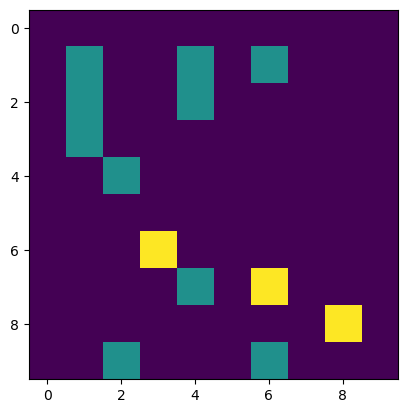

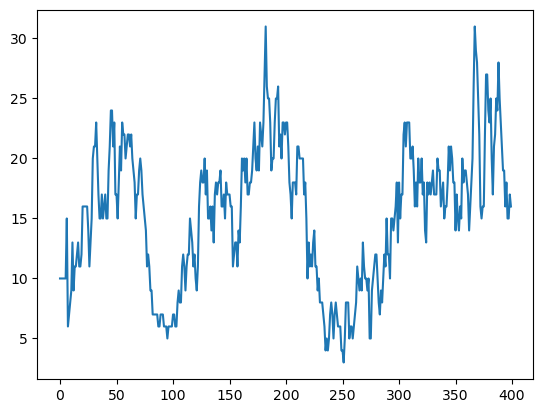

In [141]:
model = AgentModel(500, 10, prob=0.050, decay=0.90, lowest=0.0051251)
infected = []
for i in range(400):
    model.updatePositions()
    model.updateState()
    infected.append(np.sum(model.InfectedMap) )
plt.imshow(model.InfectedMap)
plt.show()
plt.plot(infected)

## Problem 5A: Understanding the code.
The following questions don't require coding.

a) How long is a person contagious? Or in other words, for how many days does an infected agent have an infection value between 0.5 and 1.0

b) Read the code to see what the incubation time is. Put differently, how many days pass between infection and becoming contagious?

c) How long does immunity last? For the purpose of this question, immunity means that the infection value is less than 0.5 but more than 0.0.

The following needs coding.

d) Suppose we want to find out how many distinct people have been infected in the 30 period day: put differently, we want to count the agents that are or have been infected in the last 30 day period.
Write code to check this.




Enter your answer in this markdown cell.

In [142]:
# code up d)

### Finding parameters
* Write code to run the model with random prob, decay and lowest parameter;
* Choose prob to be uniform random on [0, 0.01]
* Choose decay to be uniform random on [0.9, 1.0]
* Choose lower to be uniform random on [0, 0.005]
* Set the the seed equal to run
* Set the number of agents to 2000 and the width parameter to 10
* Evolve the model for 400 days. 
Perform 20 runs, and store the results, including the parameters that were used.
Below is an example; find runs with waves appearing.

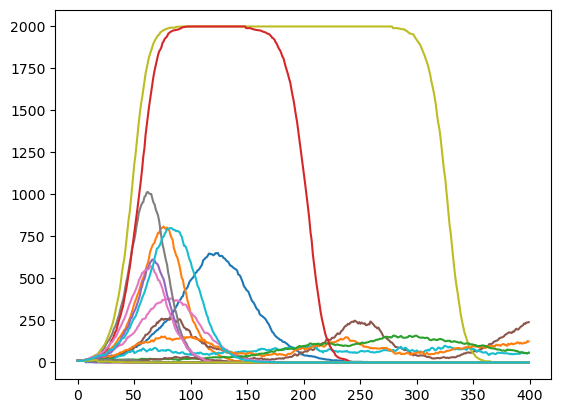

In [145]:
## running these models takes some time (about two minutes here)

In [146]:
# Use the following as reference model and parameters.
param = np.array([0.00698281+0.001, 0.9365226 , 0.00213585-0.001150095])
model = AgentModel(8000, 20, prob=param[0], decay=param[1], lowest=param[2], initial_size=40)

1) Perform 20 runs with these parameters (resetting the model after each run). On average, is the first wave or the second wave larger?
2) Examine the clearAgents member function, and redefine it such that all infected agents start at position 1,1; perform again 20 runs to see which wave is larger.

In both problems, set the seed to run and set initial\_size=40. These runs will take several minutes, so make sure that the everything is correct before committing to a long computation. Check with a single run first.

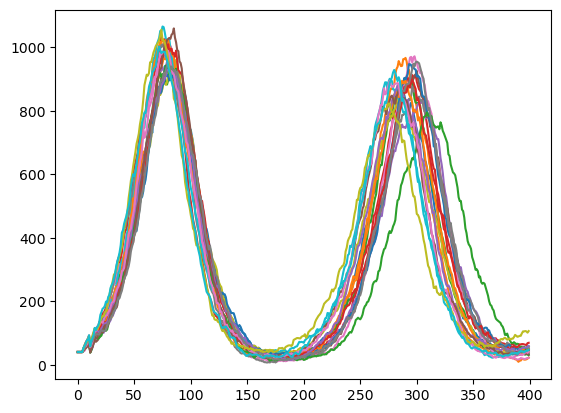

In [148]:
# code up both parts.
# Here with random positions for the agents (the model given to you.)

## ********We will use these runs later, so keep them
runs = []
infected =[]
for run in range(20):
    model = AgentModel(8000, 20, prob=param[0], decay=param[1], lowest=param[2], initial_size=40, seed=run)
    infected = []
    for i in range(400):
        model.updatePositions()
        model.updateState()
        infected.append(np.sum(model.InfectedMap) )
    #plt.imshow(model.InfectedMap)
    #plt.show()
    plt.plot(infected)
    runs.append(np.asarray(infected))

In [126]:
# Here with infected agents starting in the fixed position (1,1); add the modified class first, and perform the runs.
### Don't overwrite runs

In which situation is the second wave on average larger? Give an explanation in words:




## Problem 5B: Fitting the agent model with the SEIRS model
Take one of the runs of the agent based model with infected agents starting in random positions. 
This gives us an infected curve with 400 entries, or in other words a function $t\mapsto I_a(t)$ for $t\in \{ 0,1\ldots, 399 \}$ ($I_a$ for Infected, agent-based).
On the other hand, we also have the SEIRS model with S, E, I and R variables. The goal is to find parameters $\beta,\sigma, \gamma$ and $\omega$
First let us take a quick look at the SEIRS model.

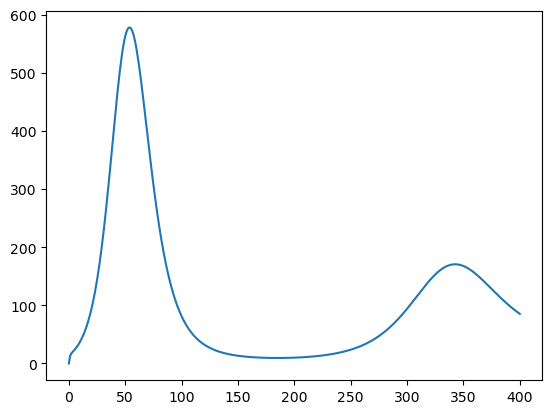

In [275]:
from scipy.integrate import odeint

alpha = 0.001
mu = 0.00125
beta = 0.33129924741018523575
sigma = 1.082
gamma = 0.2055009851228653125
omega = 0.004419820741

def seirs_vf(x, t):
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    N = (S+E+I+R)
    dS = mu *N-beta * I * S /N +omega *R -mu *S 
    dE = beta * I *S /N -sigma *E -mu *E
    dI = sigma * E -gamma *I -(mu+alpha) *I
    dR = gamma * I - omega *R -mu *R
    return [dS, dE, dI, dR]

durations = [0,400]
ic = [8000,20,0,0]
t = np.linspace(durations[0], durations[1], 400)
x = odeint(seirs_vf, ic, t)
plt.plot(t, x[:,2])

Let $t\mapsto (S(t),E(t),I(t),R(t) )$ be a solution to the SEIRS system with initial conditions $S(0)=7880, E(0)=0, I(0)=20, R(0)=0$ obtained by numerical integration. 
1) Write a function computing the norm squared of the resulting 400-dimensional vector ($t\in \{ 0,1\ldots, 399 \}$)
$$
I-I_a
$$
In short, the function should have input parameters $\beta,\sigma, \gamma$ and $\omega$, compute $I(t)$ by numerical integration, subtract the above run of the based based model and compute the norm squared. I recommend putting these four parameters in a numpy array params. For the vector $I_a$ take runs[12] from one of the earlier cells (the one with *****) 

In [171]:
def computeL2(params):
    #code this
    pass

## These parameters provide a reasonable starting point.
params = [0.329924741018523575, 1.082, 0.2055009851228653125, 0.004419820741]
computeL2(params)

41115785.39303746

2) Now we want to find parameters $\beta,\sigma, \gamma$ and $\omega$ such that $\Vert I-I_a \Vert^2$ is minimal.
Use the gradient flow for this. 
You may want to want to review Modules 40-43 for this.

a)
First compute the gradient of $N=\Vert I-I_0 \Vert^2$ with respect to these parameters, i.e.
We need to compute
$$
\nabla N =
\left(
\begin{array}{c}
\frac{\partial N}{\partial \beta} \\
\frac{\partial N}{\partial \sigma} \\
\frac{\partial N}{\partial \gamma} \\
\frac{\partial N}{\partial \omega}
\end{array}
\right)
$$
To compute each partial derivative, use the numerical approximation
$$
\frac{\partial N}{\partial \beta}|_{\beta=\beta_0} \sim \frac{N(\beta_0+h)-N(\beta_0)}{h}.
$$

The value of $N$ can be obtained with computeL2. Code up the function that computes the gradient: we are using numerical differentiation here, not backprop (for those who know this).

In [172]:
import copy

def num_grad(params):
    # code this
    pass
    


b) Now we need to compute the gradient flow. Update the parameters using the gradient descent method. You need to choose the learning rate very small, and can slowly increase to make more progress. Don't get too greedy, because then all progress can be undone. Print intermediate values of these loss function.

In [ ]:

    # code this up; you need many steps to get a decent result. I suggest you try 100, and repeat this block several times.
for i in range(100):
    delta_params = num_grad(params)
    # code up the gradient descent step with some learning rate (maybe 1e-14)
    # this is a single line only


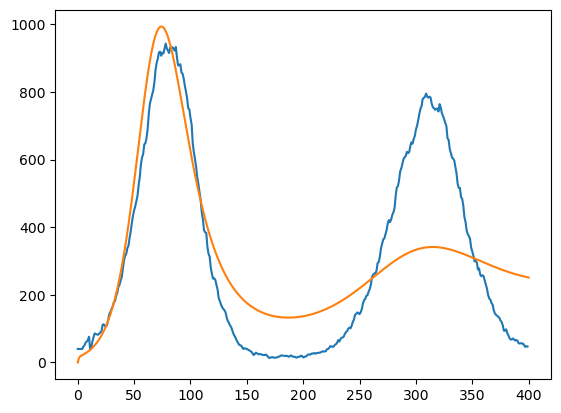

In [179]:
# Plot the results: here is an example. You won't get a very good fit.
plt.plot(runs[12])


alpha = 0.001
mu = 0.00125
beta = params[0]
sigma = params[1]
gamma = params[2]
omega = params[3]

def seirs_vf(x, t):
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    N = (S+E+I+R)
    dS = mu *N-beta * I * S /N +omega *R -mu *S 
    dE = beta * I *S /N -sigma *E -mu *E
    dI = sigma * E -gamma *I -(mu+alpha) *I
    dR = gamma * I - omega *R -mu *R
    return [dS, dE, dI, dR]

durations = [0,400]
ic = [8000,20,0,0]
t = np.linspace(durations[0], durations[1], 400)
x = odeint(seirs_vf, ic, t)
plt.plot(t, x[:,2])

## Problem 5C: Fitting with actual data
Now we load some actual data (downloaded from https://covidtracking.com/data/download). We select the column hospitalizations: this is of course not the actual infected number, but it should be correlated with the number of infections.

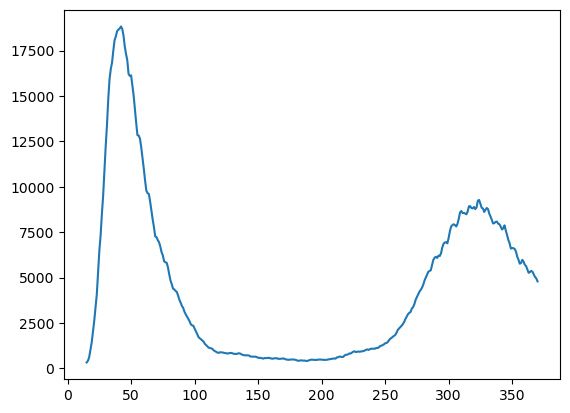

In [180]:
name = 'data/new-york-history.csv'
data = np.genfromtxt(name, skip_header=1, delimiter=',')
#
hosps = data[:,8]
hosps = hosps[::-1]
plt.plot(hosps)

Execute the following cell for a basic guess for the population sizes: we effectively end up with another fit parameter, since we are looking at hospitalizations. We will fix that parameter below in the numbers 250000, 2000. These are a bit arbitrary, and we only fix these to simplify the problem. We also have a cold start problem. The data from New York starts when the infecttion was well underway (many exposed, etc), but we ignore these issues.

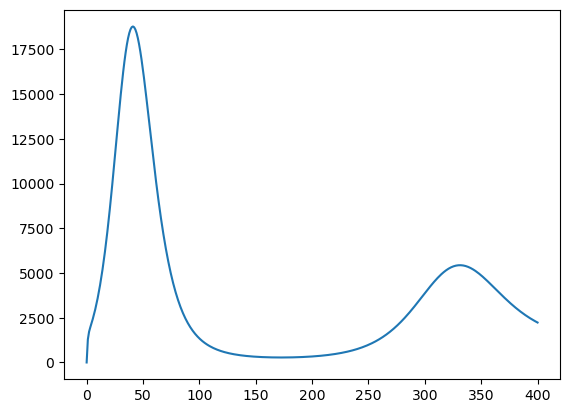

In [185]:
alpha = 0.001
mu = 0.00125
beta = 0.33129924741018523575
sigma = 1.082
gamma = 0.2055009851228653125
omega = 0.004419820741

def seirs_vf(x, t):
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    N = (S+E+I+R)
    dS = mu *N-beta * I * S /N +omega *R -mu *S 
    dE = beta * I *S /N -sigma *E -mu *E
    dI = sigma * E -gamma *I -(mu+alpha) *I
    dR = gamma * I - omega *R -mu *R
    return [dS, dE, dI, dR]

durations = [0,400]
ic = [250000,2000,0,0]
t = np.linspace(durations[0], durations[1], 371)
x = odeint(seirs_vf, ic, t)
plt.plot(t, x[:,2])

We will fit this data with the SEIRS model; you can also fit this with the agent-based model, but this python version is too slow to easily work out many runs.
In order to fit this data with the SEIRS model, use the same procedure as before. Note that several assumptions do not hold in the data. In particular, some vaccines were available during the second wave (you can check the dates in the csv file). You should set the learning parameter very small, $\eta=10^{-16}$ and slowly increase it.

Compare the SEIRS model with hosps. Note the nans, so choose a suitable slice.

1035925672.9215717

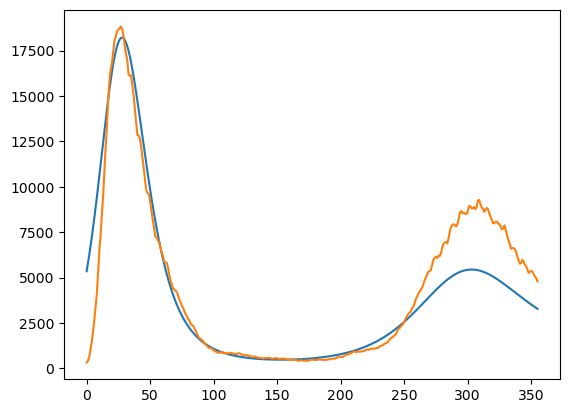

In [222]:
# code this up. Below are my results.
def computeL2(params):
    # code this: it is very similar to before.
    pass

# these parameters provide a reasonable starting point.
params = [0.30853085, 1.08053023, 0.19535719, 0.00453285]
computeL2(params)

# You need to perform many gradient descent steps: use the next code block.

In [276]:
## Code block for gradient descent.